In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = True

np.random.seed(0) # We manually set the seed for reproducible results, this is not required

# Challenge 2

Ghostie v2 counts number (per unit time) of dark matter interactions (`s`), but now there is background (`b`). The only observable available to us is the rate `r = s + b`.

We use Poisson distributions since `n` is now very large.

## Task 1

We have measured `r = 10`.

If `s = 5` and `b = 5`, compute all...



In [2]:
from scipy.stats import poisson

s = 5
b = 5
r = s + b

n = 25

n_values = np.arange(0, n + 1)

p_values_background = np.zeros(len(n_values))
p_values_signal = np.zeros(len(n_values))

for i in n_values:
    p_values_background[i] = poisson(b).pmf(i)
    p_values_signal[i] = poisson(r).pmf(i)

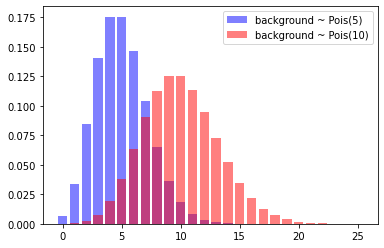

In [3]:
plt.bar(n_values, p_values_background, alpha=0.5, color="blue", label=f"background ~ Pois({b})")

plt.bar(n_values, p_values_signal, alpha=0.5, color="red", label=f"background ~ Pois({r})")

plt.legend()
plt.show()

To compute the p-value we need a way of computing `P(x >= n)`. We could sum all probabilities for x >= n or we could use a built-in function such as https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.sf.html

In [4]:
n = 10

# p_value = poisson(b).sf(n - 1) # P(x >= n)
p_value = poisson(b).pmf(n) # P(x = n)

print(f"for a background of b={b} the probability that all of our observed signal (r={r}) comes only from background is {p_value:0.2e} ({p_value*100:0.2f}%)")

for a background of b=5 the probability that all of our observed signal (r=10) comes only from background is 1.81e-02 (1.81%)


With the same detector we want to determine `s` knowing `b = 2` with an observed value of `r = 10`.

Our estimator for `s` is `r - b`.

If `s = 8` how likely is to measure `r = 10`?

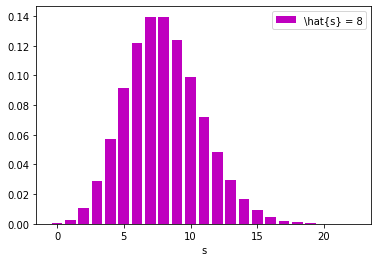

In [5]:
s = 8

n_values = np.arange(23)
p_values = [poisson(s).pmf(i) for i in n_values]

plt.bar(n_values, p_values, color="m", label=r"\hat{s} = 8")

plt.xlabel("s")
plt.legend()
plt.show()

### Confidence belts

In [6]:
n = 23 # range
n_values = np.arange(n)

X = np.zeros([n, n])

for i in np.arange(n):
    s_hat = i
    p_values = [poisson(s_hat).pmf(i) for i in n_values]
    X[:, i] = p_values

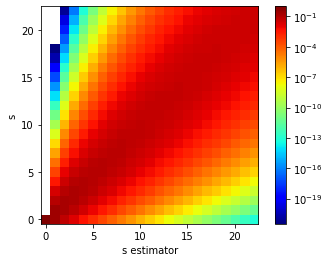

In [7]:
from matplotlib.colors import LogNorm

plt.imshow(X, origin="lower", norm = LogNorm(), cmap="jet")

plt.xlabel("s estimator")
plt.ylabel("s")

plt.colorbar()
plt.show()